In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# choose models  
from sklearn.linear_model import LinearRegression, LogisticRegression  
from mord import LogisticAT, LogisticIT  
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

In [112]:
#using uncleaned csv before any values were changed to string, looking back it would have been good to save a cleaned numerical version for ml

health_behaviour_df = pd.read_csv('Data/uncleaned_health_behaviour.csv')

In [113]:
#Select features that looked like they influenced health in exploration
#General health was ordinal but mental health and physical health are days/month of good health
#Scikit learn doesn't have an ordinal logistic regression module so I'm going to try multiple linear regression
#on these two factors
#BMI, Education, income, vegetable consumption, alchohol, race, physical activity, strength training, age, state

In [114]:
## Predicting mental health
health_behaviour_df.columns

Index(['id', '_STATE', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
       'EXRACT11', 'PAFREQ1_', '_MINAC11', 'ACTIN12_', 'EXRACT21', 'PAFREQ2_',
       '_MINAC21', 'ACTIN22_', 'STRFREQ_', 'PA2MIN_', '_METSTAT', '_URBSTAT',
       'HTIN4', 'WTKG3', '_RFBMI5', '_BMI5', '_RFSMOK3', '_RFDRHV7', 'FC601_',
       'FTJUDA2_', 'GRENDA1_', 'VEGEDA2_', 'POTADA1_', 'FRNCHDA_', '_FRUTSU1',
       '_VEGESU1', '_PAINDX2', '_PASTRNG', '_AGEG5YR', '_AGE80', 'CVDINFR4',
       'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'DIABETE4',
       'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'HLTHCVR1', 'HLTHPLN1', '_IMPRACE',
       '_EDUCAG', 'INCOME2'],
      dtype='object')

In [115]:
#quick recleaning from old code
#DON'T RERUN THIS UNLESS DAATA HAS BEEN REDOWNLOADED
health_behaviour_df.loc[health_behaviour_df.MENTHLTH == 88, "MENTHLTH"] = 0
health_behaviour_df.loc[health_behaviour_df.MENTHLTH == 77, "MENTHLTH"] = np.NaN
health_behaviour_df.loc[health_behaviour_df.MENTHLTH == 99, "MENTHLTH"] = np.NaN
health_behaviour_df.loc[health_behaviour_df.PHYSHLTH == 88, "PHYSHLTH"] = 0
health_behaviour_df.loc[health_behaviour_df.PHYSHLTH == 77, "PHYSHLTH"] = np.NaN
health_behaviour_df.loc[health_behaviour_df.PHYSHLTH == 99, "PHYSHLTH"] = np.NaN
health_behaviour_df.loc[health_behaviour_df.INCOME2 == 77, "INCOME2"] = np.NaN
health_behaviour_df.loc[health_behaviour_df.INCOME2 == 99, "INCOME2"] = np.NaN
health_behaviour_df.loc[health_behaviour_df._EDUCAG == 9, "_EDUCAG"] = np.NaN
health_behaviour_df['_VEGESU1'] = health_behaviour_df['_VEGESU1'].div(100).round(2)
health_behaviour_df.loc[health_behaviour_df._RFBMI5 == 9, "_RFBMI5"] = np.NaN
health_behaviour_df['PAFREQ1_'] = health_behaviour_df['PAFREQ1_'].div(1000).round(2)
health_behaviour_df['STRFREQ_'] = health_behaviour_df['STRFREQ_'].div(1000).round(2)
health_behaviour_df.loc[health_behaviour_df._AGEG5YR == 14, "_AGEG5YR"] = np.NaN
health_behaviour_df['REV_MENTHLTH'] = 30 - health_behaviour_df['MENTHLTH']
health_behaviour_df['REV_PHYSHLTH'] = 30 - health_behaviour_df['PHYSHLTH']
health_behaviour_df.loc[health_behaviour_df.GENHLTH == 7, "GENHLTH"] = np.NaN
health_behaviour_df.loc[health_behaviour_df.GENHLTH == 9, "GENHLTH"] = np.NaN


In [116]:
health_behaviour_df.GENHLTH = pd.to_numeric(health_behaviour_df.GENHLTH).astype('Int32')
health_behaviour_df._RFBMI5 = pd.to_numeric(health_behaviour_df._RFBMI5).astype('Int32')

## Feature Selection

Calculating correlation for each potential feature...
Data types:
'_STATE': nominal
'GENHLTH': nominal
'PHYSHLTH': ratio/discrete
'MENTHLTH': ratio/discrete
'EXRACT11': nominal
'PAFREQ1_': ratio/continuous
'_MINAC11': ratio/continuous
'ACTIN12_': nominal
'STRFREQ_': ratio/continuous
'_BMI5', ': ratio/continuous
_RFSMOK3': nominal/binary
'_RFDRHV7': nominal/binary
'_FRUTSU1': ratio/continuous
'_VEGESU1': ratio/continuous
'_PAINDX2': ratio/continuous
'_PASTRNG': ratio/continuous
'_AGEG5YR': ordinal
'_AGE80': ratio/continuous
'_IMPRACE': ordinal
'_EDUCAG': ordinal
'INCOME2': ordinal

mean=4.510 stdv=8.986


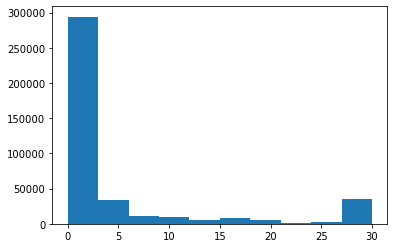

In [71]:
from numpy import mean
from numpy import std

#test distribution of ratio variables
phys_health = health_behaviour_df['PHYSHLTH'].dropna().values.tolist()
print('mean=%.3f stdv=%.3f' % (mean(phys_health), std(phys_health)))

from matplotlib import pyplot
pyplot.hist(phys_health)
pyplot.show()

mean=nan stdv=nan


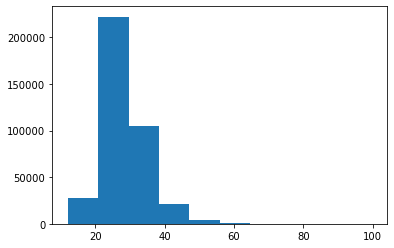

In [72]:
#test distribution of ratio variables
bmi = health_behaviour_df['_BMI5'].values.tolist()
print('mean=%.3f stdv=%.3f' % (mean(bmi), std(bmi)))

from matplotlib import pyplot
pyplot.hist(bmi)
pyplot.show()

In [7]:
health_behaviour_df['_IMPRACE'].unique()

array([2., 1., 4., 6., 5., 3.])

In [33]:
#try castings it all to int to see if mord works...



In [123]:
##Isolate features from main dataframe
# strength training, age, 
mental_ml_df = health_behaviour_df[['INCOME2', '_EDUCAG', '_VEGESU1', 'PAFREQ1_', 'STRFREQ_', '_RFBMI5', '_AGE80']] 

In [124]:
mental_ml_df.head(20)

,INCOME2,_EDUCAG,_VEGESU1,PAFREQ1_,STRFREQ_,_RFBMI5,_AGE80
0,3.0,1.0,1.14,NaN,2.33,2,80.0
1,5.0,3.0,1.21,0.47,0.00,1,70.0
2,7.0,4.0,1.64,1.00,2.00,2,67.0
3,6.0,3.0,NaN,NaN,NaN,1,80.0
4,NaN,3.0,1.78,NaN,0.00,1,80.0
5,NaN,2.0,NaN,NaN,NaN,<NA>,69.0
6,7.0,4.0,1.34,2.00,3.00,2,71.0
7,5.0,4.0,4.58,NaN,0.00,2,80.0
8,NaN,4.0,1.86,3.00,0.00,2,72.0
9,5.0,2.0,1.92,2.00,0.00,1,77.0


In [125]:
mental_ml_df.shape

(418268, 7)

In [126]:
mental_ml_df = mental_ml_df.dropna(how="any")

In [127]:
mental_ml_df.shape

(210920, 7)

In [128]:
mental_ml_df.head(20)

,INCOME2,_EDUCAG,_VEGESU1,PAFREQ1_,STRFREQ_,_RFBMI5,_AGE80
1,5.0,3.0,1.21,0.47,0.00,1,70.0
2,7.0,4.0,1.64,1.00,2.00,2,67.0
6,7.0,4.0,1.34,2.00,3.00,2,71.0
9,5.0,2.0,1.92,2.00,0.00,1,77.0
11,7.0,4.0,3.10,5.00,3.00,1,70.0
14,8.0,4.0,1.79,4.00,0.00,2,76.0
16,5.0,2.0,4.14,3.00,3.00,2,72.0
17,6.0,2.0,1.93,6.00,4.00,2,51.0
19,3.0,1.0,1.13,7.00,3.00,2,62.0
22,7.0,3.0,1.70,4.00,0.00,2,68.0


# Logistic Regression to predict obesity

### Define the features and target

In [129]:
# Define the target set.
y = mental_ml_df["_RFBMI5"].values
y[:5]

<IntegerArray>
[1, 2, 2, 1, 1]
Length: 5, dtype: Int32

In [130]:
#Define the features set
X = mental_ml_df.drop("_RFBMI5", axis=1)
X

,INCOME2,_EDUCAG,_VEGESU1,PAFREQ1_,STRFREQ_,_AGE80
1,5.0,3.0,1.21,0.47,0.0,70.0
2,7.0,4.0,1.64,1.00,2.0,67.0
6,7.0,4.0,1.34,2.00,3.0,71.0
9,5.0,2.0,1.92,2.00,0.0,77.0
11,7.0,4.0,3.10,5.00,3.0,70.0
...,...,...,...,...,...,...
418256,3.0,3.0,1.53,0.70,0.0,33.0
418257,1.0,1.0,0.15,1.00,0.0,65.0
418264,1.0,1.0,1.42,5.00,0.0,53.0
418265,3.0,2.0,0.55,7.00,0.0,19.0


### Split the Data into Training and Testing Sets

In [131]:
# Splitting into Train and Test sets into an 70/30 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.70)

In [132]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

##should the y be 1 col not 0? Could be error

(147644, 6)
(63276, 6)
(147644,)
(63276,)


### Scale the Training and Testing Data

In [133]:
#Rescale the data between 0 and 1 with a normal distribution
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [134]:
print(X_train_scaled.shape)

(147644, 6)


In [135]:
#Print out the mean and standard deviation of the scaled data 
#to confirm a normal distribution, if so the mean should be very close to 0 and the SD close to 1
print(np.mean(X_train_scaled[:,0]))
print(np.std(X_train_scaled[:,0]))
print(np.mean(X_test_scaled[:,0]))
print(np.std(X_test_scaled[:,0]))

-8.255913299534366e-17
1.0000000000000004
0.00878218675561741
0.9960856151715868


In [144]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [139]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=200,
   random_state=1)

In [140]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [141]:
y_pred = classifier.predict(X_test)

In [145]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6707756495353688


# Ordinal regression to predict general health

In [150]:
gen_health_df = health_behaviour_df[['INCOME2', '_EDUCAG', '_VEGESU1', 'PAFREQ1_', 'STRFREQ_', 'GENHLTH', '_AGE80']] 
gen_health_df = gen_health_df.dropna(how="any")
gen_health_df.head()

,INCOME2,_EDUCAG,_VEGESU1,PAFREQ1_,STRFREQ_,GENHLTH,_AGE80
1,5.0,3.0,1.21,0.47,0.0,4,70.0
2,7.0,4.0,1.64,1.00,2.0,3,67.0
6,7.0,4.0,1.34,2.00,3.0,2,71.0
9,5.0,2.0,1.92,2.00,0.0,3,77.0
11,7.0,4.0,3.10,5.00,3.0,2,70.0


In [161]:
gen_health_df['GENHLTH'].unique()

<IntegerArray>
[4, 3, 2, 1, 5]
Length: 5, dtype: Int32

### Define the features and target

In [151]:
# Define the target set.
y = gen_health_df["GENHLTH"].values
y[:5]

<IntegerArray>
[4, 3, 2, 3, 2]
Length: 5, dtype: Int32

In [152]:
#Define the features set
X = gen_health_df.drop("GENHLTH", axis=1)
X

,INCOME2,_EDUCAG,_VEGESU1,PAFREQ1_,STRFREQ_,_AGE80
1,5.0,3.0,1.21,0.47,0.0,70.0
2,7.0,4.0,1.64,1.00,2.0,67.0
6,7.0,4.0,1.34,2.00,3.0,71.0
9,5.0,2.0,1.92,2.00,0.0,77.0
11,7.0,4.0,3.10,5.00,3.0,70.0
...,...,...,...,...,...,...
418256,3.0,3.0,1.53,0.70,0.0,33.0
418257,1.0,1.0,0.15,1.00,0.0,65.0
418264,1.0,1.0,1.42,5.00,0.0,53.0
418265,3.0,2.0,0.55,7.00,0.0,19.0


In [50]:
#Question: Do you ever scale the target alongside the features? Mixed input online : https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re

In [156]:
def oraculo(X, y, model, params={}):
      (X_train, X_test, y_train, y_test) = train_test_split(X, y,          
                                           test_size=.3, stratify=y,        
                                           random_state= 3001)
      y_train=y_train.astype('int')
      y_test=y_test.astype('int')  
      pipeline = Pipeline([('column', StandardScaler()),
                          ('model', model)])
      print('Estimador: ', model)
      grid = GridSearchCV(pipeline, params, 
                          scoring='neg_mean_absolute_error', 
                          n_jobs=-1, cv=3)
      grid.fit(X_train, y_train)
      pred = grid.best_estimator_.predict(X_test)
      print('Mean Absolute Error: %1.4f' %    
            (metrics.mean_absolute_error(y_test, pred)))
      print('Accuracy: %1.4f\n' % 
            (metrics.accuracy_score(y_test,   
             np.round(pred).astype(int))))
      print(metrics.classification_report(y_test,  
             np.round(pred).astype(int)))
      print('\nDone!\n\n')

In [157]:
models = [LinearRegression(), LogisticRegression(),
          LogisticIT(), LogisticAT()]
params = [{},{'model__max_iter': [100], 'model__C': [1.0]},   
          {'model__max_iter': [100], 'model__alpha': [1.0]},
          {'model__max_iter': [100], 'model__alpha': [1.0]}]

In [158]:
for m,p in zip(models, params):
         oraculo(gen_health_df.drop('GENHLTH',axis=1),
                 gen_health_df['GENHLTH'], m, p)

Estimador:  LinearRegression()
Mean Absolute Error: 0.7411
Accuracy: 0.4099

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.26      0.00      0.00      8228
           2       0.43      0.75      0.55     16474
           3       0.37      0.42      0.39     13186
           4       0.56      0.01      0.01      4607
           5       0.00      0.00      0.00      1188

    accuracy                           0.41     43683
   macro avg       0.27      0.20      0.16     43683
weighted avg       0.38      0.41      0.33     43683


Done!




C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\

Estimador:  LogisticRegression()
Mean Absolute Error: 0.7053
Accuracy: 0.4101

              precision    recall  f1-score   support

           1       0.29      0.01      0.01      8228
           2       0.43      0.80      0.56     16474
           3       0.37      0.34      0.36     13186
           4       0.38      0.04      0.07      4607
           5       0.50      0.00      0.00      1188

    accuracy                           0.41     43683
   macro avg       0.39      0.24      0.20     43683
weighted avg       0.38      0.41      0.33     43683


Done!


Estimador:  LogisticIT()
Mean Absolute Error: 0.7052
Accuracy: 0.4083

              precision    recall  f1-score   support

           1       0.32      0.00      0.01      8228
           2       0.42      0.82      0.56     16474
           3       0.37      0.33      0.35     13186
           4       0.57      0.01      0.01      4607
           5       0.00      0.00      0.00      1188

    accuracy              

C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Estimador:  LogisticAT()
Mean Absolute Error: 0.7021
Accuracy: 0.4097

              precision    recall  f1-score   support

           1       0.27      0.00      0.00      8228
           2       0.43      0.78      0.55     16474
           3       0.37      0.37      0.37     13186
           4       0.45      0.01      0.02      4607
           5       0.00      0.00      0.00      1188

    accuracy                           0.41     43683
   macro avg       0.30      0.23      0.19     43683
weighted avg       0.37      0.41      0.32     43683


Done!




C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [164]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


Feature 0: 0.022245
Feature 1: 147.149496
Feature 2: 404.459055
Feature 3: 687.184071
Feature 4: 3208.840121
Feature 5: 2461.756528


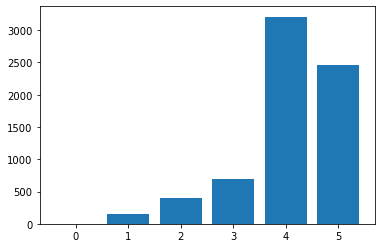

In [165]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
#this suggests features 3,4 and 5 are independent from the target, trying again using only those feautres


In [167]:
#Narrowing down features
gen_health2_df = gen_health_df.drop(["INCOME2","_EDUCAG","_VEGESU1"], axis=1)

In [170]:
# Define the target set.
y = gen_health2_df["GENHLTH"].values
y[:5]

<IntegerArray>
[4, 3, 2, 3, 2]
Length: 5, dtype: Int32

In [171]:
#Define the features set
X = gen_health2_df.drop("GENHLTH", axis=1)
X

,PAFREQ1_,STRFREQ_,_AGE80
1,0.47,0.0,70.0
2,1.00,2.0,67.0
6,2.00,3.0,71.0
9,2.00,0.0,77.0
11,5.00,3.0,70.0
...,...,...,...
418256,0.70,0.0,33.0
418257,1.00,0.0,65.0
418264,5.00,0.0,53.0
418265,7.00,0.0,19.0


In [172]:
for m,p in zip(models, params):
         oraculo(gen_health2_df.drop('GENHLTH',axis=1),
                 gen_health2_df['GENHLTH'], m, p)

Estimador:  LinearRegression()
Mean Absolute Error: 0.8218
Accuracy: 0.3706

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.18      0.00      0.00      8228
           2       0.38      0.75      0.51     16474
           3       0.34      0.30      0.31     13186
           4       0.00      0.00      0.00      4607
           5       0.00      0.00      0.00      1188

    accuracy                           0.37     43683
   macro avg       0.15      0.17      0.14     43683
weighted avg       0.28      0.37      0.29     43683


Done!




C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\

Estimador:  LogisticRegression()
Mean Absolute Error: 0.7849
Accuracy: 0.3766

              precision    recall  f1-score   support

           1       0.17      0.00      0.01      8228
           2       0.38      1.00      0.55     16474
           3       0.00      0.00      0.00     13186
           4       0.00      0.00      0.00      4607
           5       0.00      0.00      0.00      1188

    accuracy                           0.38     43683
   macro avg       0.11      0.20      0.11     43683
weighted avg       0.17      0.38      0.21     43683


Done!




C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Estimador:  LogisticIT()
Mean Absolute Error: 0.7814
Accuracy: 0.3773

              precision    recall  f1-score   support

           1       0.13      0.00      0.00      8228
           2       0.38      0.98      0.55     16474
           3       0.35      0.02      0.04     13186
           4       0.00      0.00      0.00      4607
           5       0.00      0.00      0.00      1188

    accuracy                           0.38     43683
   macro avg       0.17      0.20      0.12     43683
weighted avg       0.27      0.38      0.22     43683


Done!




C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Estimador:  LogisticAT()
Mean Absolute Error: 0.7760
Accuracy: 0.3761

              precision    recall  f1-score   support

           1       0.12      0.00      0.00      8228
           2       0.38      0.87      0.53     16474
           3       0.34      0.16      0.22     13186
           4       0.00      0.00      0.00      4607
           5       0.00      0.00      0.00      1188

    accuracy                           0.38     43683
   macro avg       0.17      0.21      0.15     43683
weighted avg       0.27      0.38      0.27     43683


Done!




C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Scaling and using 'INCOME2', '_EDUCAG', '_VEGESU1', '_BMI5', 'PAFREQ1_', 'STRFREQ_', '_AGE80', _IMPRACE, _STATE
- Mean squared error: 49.22 
- R Squared: 0.07
- Adjusted R squared: 0.06956
- Root Means Squared Error: 7.0158
#Scaling and using 'INCOME2', '_EDUCAG', '_VEGESU1', '_BMI5', 'PAFREQ1_', 'STRFREQ_', '_AGE80'
- Mean squared error: 49.25
- R Squared: 0.07
- Adjusted R squared: 0.06871
- Root Means Squared Error: 7.01799
#Scaling and using 'INCOME2', '_EDUCAG', '_VEGESU1', '_BMI5', '_AGE80'
- Mean squared error: 59.96
- R Squared: 0.07
- Adjusted R squared: 0.06966
- Root Means Squared Error: 7.74336
